In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def compute_cost(X,y,theta):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions-y)**2
    J = (1.0/(2*m))*sqErrors.sum()
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

        

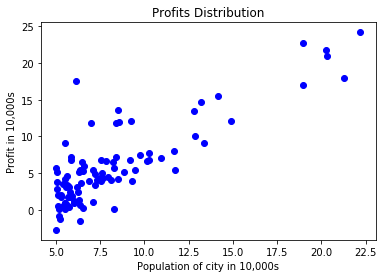

In [36]:
data = np.loadtxt('ex1data1.txt',delimiter=',')
plt.scatter(data[:,0],data[:,1],marker='o',c='b')
plt.title('Profits Distribution')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in 10,000s')
plt.show()

In [52]:
X = data[:,0]
y = data[:,1]
m = y.size

it = np.ones(shape=(m,2))
it[:,1] = X
theta = np.zeros(shape=(2, 1))
iterations = 1500
alpha = 0.01

print compute_cost(it, y, theta)
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
print theta
predict1 = np.array([1, 3.5]).dot(theta).flatten()
print 'For population = 35,000, we predict a profit of %f' % (predict1 * 10000)
predict2 = np.array([1, 7.0]).dot(theta).flatten()
print 'For population = 70,000, we predict a profit of %f' % (predict2 * 10000)

32.0727338775
[[-3.63029144]
 [ 1.16636235]]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


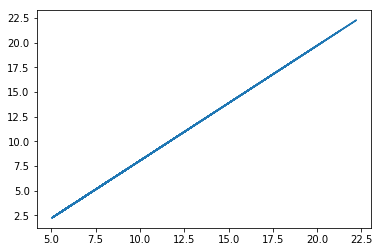

In [47]:
result = it.dot(theta).flatten()
plt.plot(data[:, 0], result)
plt.show()

In [55]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)

J_vals = np.zeros(shape=(theta0_vals.size,theta1_vals.size))
for t1,element in enumerate(theta0_vals):
    for t2,element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2,1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1,t2] = compute_cost(it,y,thetaT)

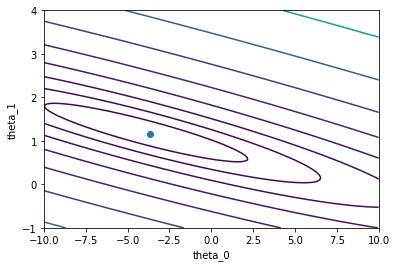

In [56]:
#contour plot

J_vals = J_vals.T
plt.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2,3,20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.scatter(theta[0][0], theta[1][0])
plt.show()